In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from scipy.stats import mannwhitneyu
import pandas as pd
import matplotlib.lines as mlines
import matplotlib.dates as mdates

In [2]:
#import fires and datapath
fires = gpd.read_file('/g/data/ng72/as9583/merged_fires.gpkg')
fires = fires.to_crs("EPSG:7844")

datapath = f'/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new'

## Latent heat flux

In [3]:
variable = 'latent_heat_flux'

experiment1 = 'drysoil_d0198_RAL3P2_albedo_bare_' 
allvar = xr.open_dataset(f'{datapath}/{variable}/{experiment1}{variable}.nc')['surface_upward_latent_heat_flux']

experiment2 = 'control_d0198_RAL3P2_' 
control = xr.open_dataset(f'{datapath}/{variable}/{experiment2}{variable}.nc')['surface_upward_latent_heat_flux']

experiment3 = 'control_d0198_RAL3P2_albedo_bare_'
albedo_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment3}{variable}.nc')['surface_upward_latent_heat_flux']

experiment4 = 'control_d0198_RAL3P2_albedo_'
albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment4}{variable}.nc')['surface_upward_latent_heat_flux']

experiment5 = 'control_d0198_RAL3P2_bare_'
bare = xr.open_dataset(f'{datapath}/{variable}/{experiment5}{variable}.nc')['surface_upward_latent_heat_flux']

experiment6 = 'drysoil_d0198_RAL3P2_albedo_'
SM_albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment6}{variable}.nc')['surface_upward_latent_heat_flux']

experiment7 = 'drysoil_d0198_RAL3P2_bare_'
SM_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment7}{variable}.nc')['surface_upward_latent_heat_flux']

experiment8 = 'drysoil_d0198_RAL3P2_'
SM = xr.open_dataset(f'{datapath}/{variable}/{experiment8}{variable}.nc')['surface_upward_latent_heat_flux']

#clip to land only
variable3 = 'land_sea_mask'
landmask = xr.open_dataset(f'{datapath}/{variable3}/{experiment1}{variable3}.nc')["land_binary_mask"].isel(time=0)
allvar_l = allvar.where(landmask == 1)
control_l = control.where(landmask == 1)
albedo_bare_l = albedo_bare.where(landmask == 1)
albedo_l = albedo.where(landmask == 1)
bare_l = bare.where(landmask == 1)
SM_albedo_l = SM_albedo.where(landmask == 1)
SM_bare_l = SM_bare.where(landmask == 1)
SM_l = SM.where(landmask == 1)

In [4]:
experiments_l = {
    "AllVar": allvar_l,
    "Control": control_l,
    "Albedo_Bare": albedo_bare_l,
    "Albedo": albedo_l,
    "Bare": bare_l,
    "SM_Albedo": SM_albedo_l,
    "SM_Bare": SM_bare_l,
    "SM": SM_l
}

clipped = {}

for name, da in experiments_l.items():
    da = da.rio.write_crs("EPSG:7844")
    
    clipped_da = da.rio.clip(fires.geometry, fires.crs, drop=True, invert=False)
    
    clipped[name] = clipped_da

#latent data clipped to fire scars
allvar_l = clipped['AllVar']
control_l =clipped['Control']
albedo_bare_l =clipped['Albedo_Bare']
albedo_l =clipped['Albedo']
bare_l =clipped['Bare']
SM_albedo_l =clipped['SM_Albedo']
SM_bare_l =clipped['SM_Bare']
SM_l =clipped['SM']
experiments_l = {
    "All Variables": allvar_l,
    "Control": control_l,
    "Albedo + Bare": albedo_bare_l,
    "Albedo": albedo_l,
    "Bare": bare_l,
    "SM + Albedo": SM_albedo_l,
    "SM + Bare": SM_bare_l,
    "SM": SM_l
}

In [5]:
#compute diurnal cycle for fire scars (diff from control)
lh_series = {}
for name, da in experiments_l.items():
    da = da.assign_coords(time=da.time + pd.Timedelta(hours=10)) #AEST
    lh_series[name] = da.mean(dim=["latitude", "longitude"], skipna=True)

lh_diurnal = {}
for name, series in lh_series.items():
    lh_diurnal[name] = series.groupby("time.hour").mean("time")

ref = lh_diurnal["Control"]

lh_diff = {}
for name, series in lh_diurnal.items():
    if name != "Control":
        #align on hour dimension 
        series, ref_aligned = xr.align(series, ref)
        lh_diff[name] = series - ref_aligned

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Enteri

## Sensible heat flux

In [6]:
variable = 'sensible_heat_flux'

experiment1 = 'drysoil_d0198_RAL3P2_albedo_bare_' 
allvar = xr.open_dataset(f'{datapath}/{variable}/{experiment1}{variable}.nc')['surface_upward_sensible_heat_flux']

experiment2 = 'control_d0198_RAL3P2_' 
control = xr.open_dataset(f'{datapath}/{variable}/{experiment2}{variable}.nc')['surface_upward_sensible_heat_flux']

experiment3 = 'control_d0198_RAL3P2_albedo_bare_'
albedo_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment3}{variable}.nc')['surface_upward_sensible_heat_flux']

experiment4 = 'control_d0198_RAL3P2_albedo_'
albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment4}{variable}.nc')['surface_upward_sensible_heat_flux']

experiment5 = 'control_d0198_RAL3P2_bare_'
bare = xr.open_dataset(f'{datapath}/{variable}/{experiment5}{variable}.nc')['surface_upward_sensible_heat_flux']

experiment6 = 'drysoil_d0198_RAL3P2_albedo_'
SM_albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment6}{variable}.nc')['surface_upward_sensible_heat_flux']

experiment7 = 'drysoil_d0198_RAL3P2_bare_'
SM_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment7}{variable}.nc')['surface_upward_sensible_heat_flux']

experiment8 = 'drysoil_d0198_RAL3P2_'
SM = xr.open_dataset(f'{datapath}/{variable}/{experiment8}{variable}.nc')['surface_upward_sensible_heat_flux']

allvar_s = allvar.where(landmask == 1)
control_s = control.where(landmask == 1)
albedo_bare_s = albedo_bare.where(landmask == 1)
albedo_s = albedo.where(landmask == 1)
bare_s = bare.where(landmask == 1)
SM_albedo_s = SM_albedo.where(landmask == 1)
SM_bare_s = SM_bare.where(landmask == 1)
SM_s = SM.where(landmask == 1)

experiments_s = {
    "AllVar": allvar_s,
    "Control": control_s,
    "Albedo_Bare": albedo_bare_s,
    "Albedo": albedo_s,
    "Bare": bare_s,
    "SM_Albedo": SM_albedo_s,
    "SM_Bare": SM_bare_s,
    "SM": SM_s
}

In [7]:
#clip to fires
clipped = {}

for name, da in experiments_s.items():
    da = da.rio.write_crs("EPSG:7844")
    
    clipped_da = da.rio.clip(fires.geometry, fires.crs, drop=True, invert=False)
    
    clipped[name] = clipped_da

allvar_s = clipped['AllVar']
control_s =clipped['Control']
albedo_bare_s =clipped['Albedo_Bare']
albedo_s =clipped['Albedo']
bare_s =clipped['Bare']
SM_albedo_s =clipped['SM_Albedo']
SM_bare_s=clipped['SM_Bare']
SM_s =clipped['SM']

#sensible heat fire scar dict
experiments_s = {
    "All Variables": allvar_s,
    "Control": control_s,
    "Albedo + Bare": albedo_bare_s,
    "Albedo": albedo_s,
    "Bare": bare_s,
    "SM + Albedo": SM_albedo_s,
    "SM + Bare": SM_bare_s,
    "SM": SM_s
}

In [8]:
#diurnal cycle diff from control

sh_series = {}
for name, da in experiments_s.items():
    da = da.assign_coords(time=da.time + pd.Timedelta(hours=10)) #AEST
    sh_series[name] = da.mean(dim=["latitude", "longitude"], skipna=True)

sh_diurnal = {}
for name, series in sh_series.items():
    sh_diurnal[name] = series.groupby("time.hour").mean("time")

ref = sh_diurnal["Control"]

sh_diff = {}
for name, series in sh_diurnal.items():
    if name != "Control":
        #align on hour dimension
        series, ref_aligned = xr.align(series, ref)
        sh_diff[name] = series - ref_aligned

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Enteri

## Surface net shortwave flux

In [9]:
variable = 'surface_net_shortwave_flux'

experiment1 = 'drysoil_d0198_RAL3P2_albedo_bare_' 
allvar = xr.open_dataset(f'{datapath}/{variable}/{experiment1}{variable}.nc')['filled-74739cab7f11967c794e69d14ca96a6e']

experiment2 = 'control_d0198_RAL3P2_' 
control = xr.open_dataset(f'{datapath}/{variable}/{experiment2}{variable}.nc')['filled-2e8ca822bc6613d565f54acb6270a124']

experiment3 = 'control_d0198_RAL3P2_albedo_bare_'
albedo_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment3}{variable}.nc')['filled-6be00eaae411f9de2aa161cf22dce56c']

experiment4 = 'control_d0198_RAL3P2_albedo_'
albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment4}{variable}.nc')['filled-e715fe3b641dccad1f1bd7bd84d7da01']

experiment5 = 'control_d0198_RAL3P2_bare_'
bare = xr.open_dataset(f'{datapath}/{variable}/{experiment5}{variable}.nc')['filled-2b04d43f0372f6635a635314ab2f04f1']

experiment6 = 'drysoil_d0198_RAL3P2_albedo_'
SM_albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment6}{variable}.nc')['filled-00e4e6b264941d5349c787e74943bbb3']

experiment7 = 'drysoil_d0198_RAL3P2_bare_'
SM_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment7}{variable}.nc')['filled-57dd935f3dfe5c9e789785f5c8d8d8c8']

experiment8 = 'drysoil_d0198_RAL3P2_'
SM = xr.open_dataset(f'{datapath}/{variable}/{experiment8}{variable}.nc')['filled-078ce92b73f6652a7ccf9d8762c8827d']

allvar = allvar.where(landmask == 1)
control = control.where(landmask == 1)
albedo_bare = albedo_bare.where(landmask == 1)
albedo = albedo.where(landmask == 1)
bare = bare.where(landmask == 1)
SM_albedo = SM_albedo.where(landmask == 1)
SM_bare = SM_bare.where(landmask == 1)
SM = SM.where(landmask == 1)

experiments_sw = {
    "All Variables": allvar,
    "Control": control,
    "Albedo + Bare": albedo_bare,
    "Albedo": albedo,
    "Bare": bare,
    "SM + Albedo": SM_albedo,
    "SM + Bare": SM_bare,
    "SM": SM
}


In [10]:
#clip to fires
clipped = {}

for name, da in experiments_sw.items():
    da = da.rio.write_crs("EPSG:7844")
    
    clipped_da = da.rio.clip(fires.geometry, fires.crs, drop=True, invert=False)
    
    clipped[name] = clipped_da

allvar = clipped['All Variables']
control =clipped['Control']
albedo_bare =clipped['Albedo + Bare']
albedo =clipped['Albedo']
bare =clipped['Bare']
SM_albedo =clipped['SM + Albedo']
SM_bare=clipped['SM + Bare']
SM =clipped['SM']

#new dictionary for clipped
experiments_sw = {
    "All Variables": allvar,
    "Control": control,
    "Albedo + Bare": albedo_bare,
    "Albedo": albedo,
    "Bare": bare,
    "SM + Albedo": SM_albedo,
    "SM + Bare": SM_bare,
    "SM": SM
}

In [11]:
sw_series = {}
for name, da in experiments_sw.items():
    da = da.assign_coords(time=da.time + pd.Timedelta(hours=10))
    sw_series[name] = da.mean(dim=["latitude", "longitude"], skipna=True)

sw_diurnal = {}
for name, series in sw_series.items():
    sw_diurnal[name] = series.groupby("time.hour").mean("time")

ref = sw_diurnal["Control"]

sw_diff = {}
for name, series in sw_diurnal.items():
    if name != "Control":
        #align on hour dimension 
        series, ref_aligned = xr.align(series, ref)
        sw_diff[name] = series - ref_aligned

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Enteri

## Surface net longwave radiation

In [12]:
variable = 'surface_net_longwave_flux'

experiment1 = 'drysoil_d0198_RAL3P2_albedo_bare_' 
allvar = xr.open_dataset(f'{datapath}/{variable}/{experiment1}{variable}.nc')['surface_net_downward_longwave_flux']

experiment2 = 'control_d0198_RAL3P2_' 
control = xr.open_dataset(f'{datapath}/{variable}/{experiment2}{variable}.nc')['surface_net_downward_longwave_flux']

experiment3 = 'control_d0198_RAL3P2_albedo_bare_'
albedo_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment3}{variable}.nc')['surface_net_downward_longwave_flux']

experiment4 = 'control_d0198_RAL3P2_albedo_'
albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment4}{variable}.nc')['surface_net_downward_longwave_flux']

experiment5 = 'control_d0198_RAL3P2_bare_'
bare = xr.open_dataset(f'{datapath}/{variable}/{experiment5}{variable}.nc')['surface_net_downward_longwave_flux']

experiment6 = 'drysoil_d0198_RAL3P2_albedo_'
SM_albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment6}{variable}.nc')['surface_net_downward_longwave_flux']

experiment7 = 'drysoil_d0198_RAL3P2_bare_'
SM_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment7}{variable}.nc')['surface_net_downward_longwave_flux']

experiment8 = 'drysoil_d0198_RAL3P2_'
SM = xr.open_dataset(f'{datapath}/{variable}/{experiment8}{variable}.nc')['surface_net_downward_longwave_flux']

allvar = allvar.where(landmask == 1)
control = control.where(landmask == 1)
albedo_bare = albedo_bare.where(landmask == 1)
albedo = albedo.where(landmask == 1)
bare = bare.where(landmask == 1)
SM_albedo = SM_albedo.where(landmask == 1)
SM_bare = SM_bare.where(landmask == 1)
SM = SM.where(landmask == 1)

experiments_lw = {
    "All Variables": allvar,
    "Control": control,
    "Albedo + Bare": albedo_bare,
    "Albedo": albedo,
    "Bare": bare,
    "SM + Albedo": SM_albedo,
    "SM + Bare": SM_bare,
    "SM": SM
}

In [13]:
#clip to fires
clipped = {}

for name, da in experiments_lw.items():
    da = da.rio.write_crs("EPSG:7844")
    
    clipped_da = da.rio.clip(fires.geometry, fires.crs, drop=True, invert=False)
    
    clipped[name] = clipped_da

allvar = clipped['All Variables']
control =clipped['Control']
albedo_bare =clipped['Albedo + Bare']
albedo =clipped['Albedo']
bare =clipped['Bare']
SM_albedo =clipped['SM + Albedo']
SM_bare=clipped['SM + Bare']
SM =clipped['SM']

#new dictionary for clipped
experiments_lw = {
    "All Variables": allvar,
    "Control": control,
    "Albedo + Bare": albedo_bare,
    "Albedo": albedo,
    "Bare": bare,
    "SM + Albedo": SM_albedo,
    "SM + Bare": SM_bare,
    "SM": SM
}

In [14]:
lw_series = {}
for name, da in experiments_lw.items():
    da = da.assign_coords(time=da.time + pd.Timedelta(hours=10))
    lw_series[name] = da.mean(dim=["latitude", "longitude"], skipna=True)

lw_diurnal = {}
for name, series in lw_series.items():
    lw_diurnal[name] = series.groupby("time.hour").mean("time")

ref = lw_diurnal["Control"]

lw_diff = {}
for name, series in lw_diurnal.items():
    if name != "Control":
        #align on hour dimension 
        series, ref_aligned = xr.align(series, ref)
        lw_diff[name] = series - ref_aligned

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Enteri

## plot together

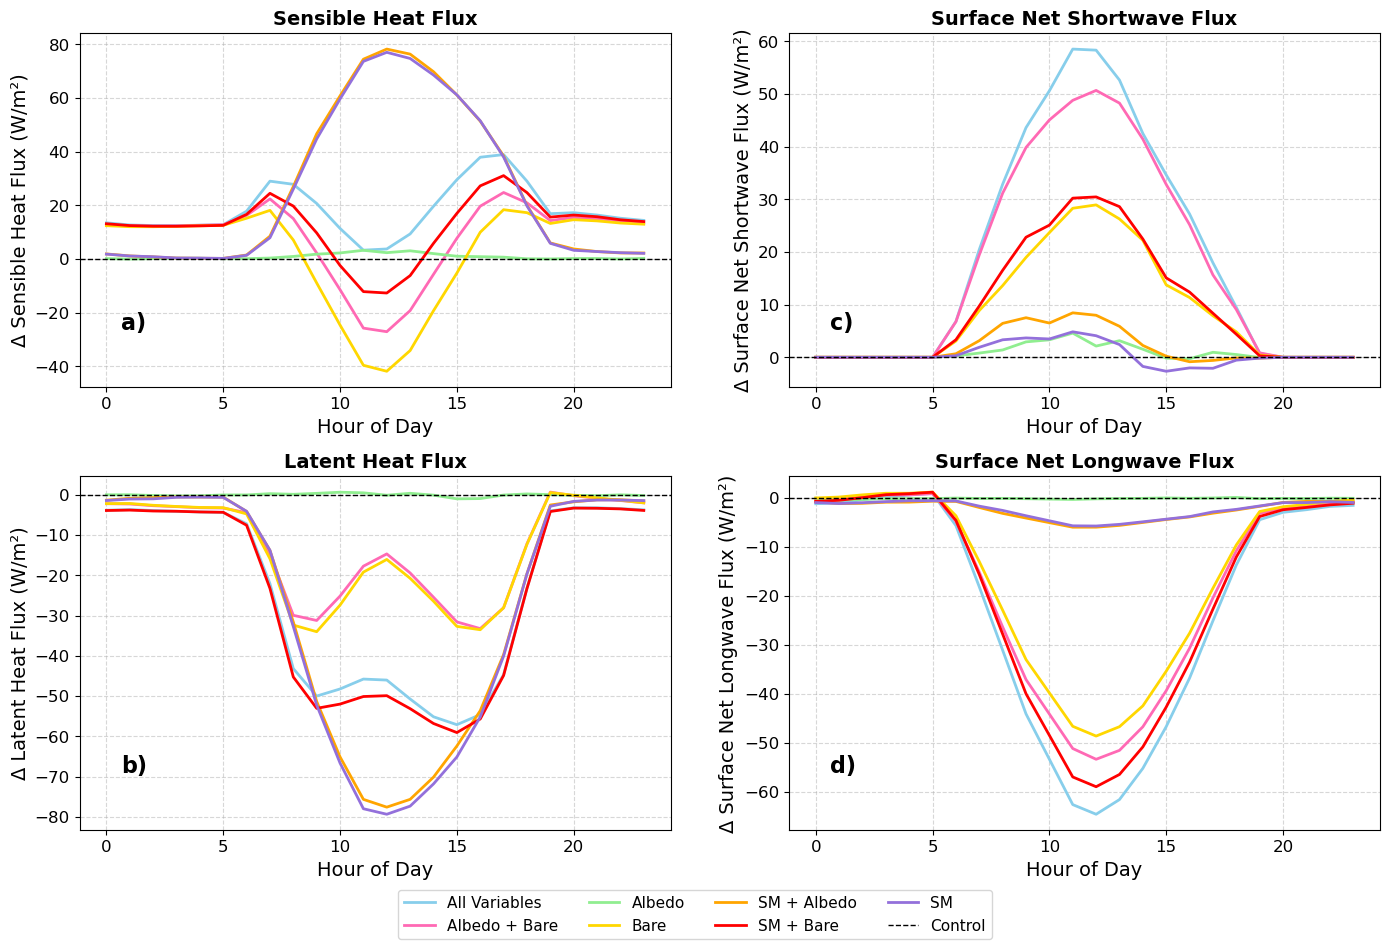

In [16]:
#consistent colors
colors = ["skyblue", "hotpink", "lightgreen", "gold", 
          "orange", "red", "mediumpurple", "pink"]

#all datasets
diff_datasets = [sh_diff, sw_diff, lh_diff, lw_diff]
titles = [
    "Sensible Heat Flux",
    "Surface Net Shortwave Flux",
    "Latent Heat Flux",
    "Surface Net Longwave Flux"
]
ylabels = [
    "Δ Sensible Heat Flux (W/m²)",
    "Δ Surface Net Shortwave Flux (W/m²)",
    "Δ Latent Heat Flux (W/m²)",
    "Δ Surface Net Longwave Flux (W/m²)"
]
labels = ['a)', 'c)', 'b)', 'd)']

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False)
axes = axes.flatten()

#experiment order from one dataset
experiment_names = list(lh_diff.keys())

for i, (ax, dataset, title, ylabel) in enumerate(zip(axes, diff_datasets, titles, ylabels)):
    for name, color in zip(experiment_names, colors):
        diff = dataset[name]
        ax.plot(diff["hour"], diff.values, color=color, label=name, linewidth=2)
    ax.axhline(0, color="k", linestyle="--", linewidth=1, label = 'Control')
    ax.set_title(title, fontsize=14, fontweight = 'bold')
    ax.set_xlabel("Hour of Day", fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.text(0.07, 0.15, labels[i], transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='bottom', ha='left')

#legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=4, fontsize=11)
# fig.suptitle("Difference in Diurnal Cycle from Control (All Experiments)", fontsize=15, weight="bold")
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
fig.subplots_adjust(wspace = 0.2, hspace = 0.25)
# plt.savefig('/g/data/ng72/as9583/new_analysis/figures/fluxes_all.png', dpi = 300, bbox_inches='tight')
plt.show()
